In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus']=False
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import imdb

In [3]:
import urllib.request

In [4]:
# 1. 데이터 불러오기
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", filename="ratings_train.txt")
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt", filename="ratings_test.txt")


('ratings_test.txt', <http.client.HTTPMessage at 0x1a638317a00>)

In [36]:

train_data = pd.read_table('ratings_train.txt')
test_data = pd.read_table('ratings_test.txt')

print(train_data)

              id                                           document  label
0        9976970                                아 더빙.. 진짜 짜증나네요 목소리      0
1        3819312                  흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나      1
2       10265843                                  너무재밓었다그래서보는것을추천한다      0
3        9045019                      교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정      0
4        6483659  사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...      1
...          ...                                                ...    ...
149995   6222902                                인간이 문제지.. 소는 뭔죄인가..      0
149996   8549745                                      평점이 너무 낮아서...      1
149997   9311800                    이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?      0
149998   2376369                        청춘 영화의 최고봉.방황과 우울했던 날들의 자화상      1
149999   9619869                           한국 영화 최초로 수간하는 내용이 담긴 영화      0

[150000 rows x 3 columns]


In [ ]:
# 파일을 저장해서 불러오기
# train_data.to_csv('train_data.csv')
# train_data.to_csv('test_data.csv')

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


In [7]:
train_data.describe()

,id,label
count,1.500000e+05,150000.000000
mean,6.743533e+06,0.498847
std,2.919051e+06,0.500000
min,3.300000e+01,0.000000
25%,4.766881e+06,0.000000
50%,7.526840e+06,0.000000
75%,9.249435e+06,1.000000
max,1.027815e+07,1.000000


In [8]:
print("댓글개수 : ",len(train_data))

댓글개수 :  150000


In [9]:
train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [10]:
# train_data : 150000 / test_data : 50000
print("test_data : ",len(test_data))

test_data :  50000


In [11]:
test_data.head()

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


In [14]:
# unique() : 중복을 제거하고 출력
# nunique() : 중복을 제거하고 개수 출력
# 150000, 50000
train_data['document'].nunique(),test_data['document'].nunique()

(146182, 49157)

In [15]:
# document컬럼에서 중복을 제거하고 저장
train_data.drop_duplicates(subset=['document'],inplace=True)

In [17]:
# 개수 : 146183
print("중복제거후 개수 :",len(train_data))

중복제거후 개수 : 146183


<AxesSubplot:>

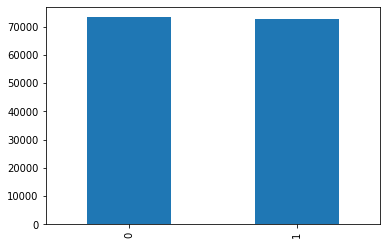

In [18]:
# label의 값별로 데이터의 수를 출력
train_data['label'].value_counts().plot(kind ='bar')

In [20]:
# label의 값으로 개수 출력
# train_data.groupby('label').size()
train_data.groupby('label').size().reset_index(name='count')

,label,count
0,0,73342
1,1,72841


In [21]:
# 데이터 개수 확인
# null개수 확인
# train_data : null이 있으면 True, 없으면 False
train_data.isnull().values.any()

True

In [22]:
train_data.isnull().sum()

id          0
document    1
label       0
dtype: int64

In [23]:
# null데이터 행 출력
train_data.loc[train_data.document.isnull()]

,id,document,label
25857,2172111,NaN,1


In [24]:
# null데이터의 행을 삭제
train_data = train_data.dropna(how='any')

In [25]:
train_data.isnull().values.any()

False

In [26]:
print(len(train_data))

146182


In [33]:
# 정규표현식 
import re
eng_txt = 'aaa bbbcd love 111 33you i23445~~~ !! kfaq, @#$'
re.sub(r'[^a-zA-Z ]','',eng_txt)


'aaa bbbcd love  you i  kfaq '

In [37]:
# 한글만 제외하고 모두 삭제처리
train_data['document'] = train_data['document'].str.replace('[^ㄱ-하-ㅣ가-힣 ]','')
train_data[:5]
# train_data.head()

C:\Users\jmpkorea00\AppData\Local\Temp\ipykernel_4400\1749625636.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['document'] = train_data['document'].str.replace('[^ㄱ-하-ㅣ가-힣 ]','')


,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,1


In [38]:
# replace 하면 빈공백만 존재하는 데이터가 존재할수 있음. 행
train_data['document'] = train_data['document'].str.replace('^ +','')

C:\Users\jmpkorea00\AppData\Local\Temp\ipykernel_4400\1068300926.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['document'] = train_data['document'].str.replace('^ +','')


In [39]:
#  '' 빈공백 -> null변경
train_data['document'].replace('',np.nan,inplace=True)
# null데이터 개수
train_data.isnull().sum()

id             0
document    1214
label          0
dtype: int64

In [40]:
train_data.loc[train_data.document.isnull()][:5]

,id,document,label
404,4221289,NaN,0
412,9509970,NaN,1
470,10147571,NaN,1
584,7117896,NaN,0
593,6478189,NaN,0


In [41]:
# null 삭제
# 148786개 
train_data = train_data.dropna(how='any')
print(len(train_data))

148786
